### General rules:
 * For all figures that you generate, remember to add meaningful labels to the axes (including units), and provide a legend and colorbar, if applicable.
 * Do not hard code constants, like number of samples, number of channels, etc in your program. These values should always be determined from the given data. This way, you can easily use the code to analyse other data sets.
 * Do not use high-level functions from toolboxes like scikit-learn.
 * Before submitting, check your code by executing: Kernel -> Restart & run all.
 * Replace *Template* by your *FirstnameLastname* in the filename, or by *Lastname1Lastname2* if you work in pairs.

# BCI-IL WS 2018/2019 - Exercise Sheet #02

#### Name(s):

In [2]:
% matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import bci_minitoolbox as bci

## Preparation: Loading Data

In [4]:
fname = 'erp_hexVPsag.npz'
cnt, fs, clab, mnt, mrk_pos, mrk_class, mrk_className = bci.load_data(fname)

## Exercise 1: Scatter Plot of 2D Features  (8 points)

Make a scatter plot of the two distributions - *targets* and *nontargets*, one dot for each trial. On the `x`-axis, plot the value of channel Cz at `t` = 380 ms, and at the `y`-axis the value of PO3 at `t` = 300 ms. *(You may refer to the results of sheet 01 for the reason of this choice.)*
Draw for both distributions the two principal axes, with the lengths of the axes being the standard deviation of the data in that direction. 
Draw also the corresponding ellipses. **Hint:** You can get that with a transformation of the unit circle as on the slide *Illustration of Multiplication ...*.

In [ ]:
def ellipse_decomp(x,y):
    # Input: x, y numpy arrays of a set of points (according to x and y axis)
    # 
    # Return: ellipse: 2D matrix of the standard deviation ellipse, 
    #         x, y: lists of the eigenvectors with the mean, split into x and y positions.

    t = np.linspace(0,np.pi*2,100)
    
    circ = np.array([np.cos(t), np.sin(t)])

    matrix = np.array([x, y])
    cov = np.cov(matrix)
    eigval, eigvec = np.linalg.eig(cov)

    D = np.diag(np.sqrt(eigval))   
    covroot = np.dot(eigvec, np.dot(D, eigvec))
    
    mean = np.mean(matrix,axis=1)
    elli = np.dot(covroot, circ)
    elli[0] += mean[0]
    elli[1] += mean[1]
    
    vec1 = np.dot(covroot, eigvec[0])
    vec2 = np.dot(covroot, eigvec[1])
    
    x, y = np.split([vec2+mean, mean, vec1+mean], [-1], axis=1)
    return elli, x, y

ival= [-100, 1000]
ref_ival= [-100, 0]
chans = ['Cz', 'PO3']

epo, epo_t = bci.makeepochs(cnt, fs, mrk_pos, ival)
epo = bci.baseline(epo, epo_t, ref_ival)

timeCz = np.where(epo_t == 380)
timePO3 = np.where(epo_t == 300)

iCz = clab.index(chans[0])
iPO3 = clab.index(chans[1])

Cz_values = epo[timeCz, iCz, mrk_class == 1]
PO3_values = epo[timePO3, iPO3, mrk_class == 1]
Cz_targets = epo[timeCz, iCz, mrk_class == 0]
PO3_targets = epo[timePO3, iPO3, mrk_class == 0]

#### MAKING THE ELLIPSES
ellipseT, x1, y1 = ellipse_decomp(Cz_targets[0], PO3_targets[0])
ellipseN, x2, y2 = ellipse_decomp(Cz_values[0], PO3_values[0])

plt.style.use('dark_background')
plt.figure(figsize = [6.4*2, 4.8*2])
plt.grid()
plt.title('Response at Cz (300 ms) and PO3 (380 ms)')
plt.scatter(Cz_values, PO3_values, c = 'm', marker = 'x', label='Nontargets')
plt.scatter(Cz_targets, PO3_targets, c = 'r', marker = 'o', label='Targets')
plt.plot(ellipseT[0], ellipseT[1], 'w')
plt.plot(ellipseN[0], ellipseN[1], 'w')

plt.plot(x1, y1, 'yo-', label ='PC, targets')
plt.plot(x2, y2, 'co-', label = 'PC, nontargets')

plt.ylabel('PO3, potential')
plt.xlabel('Cz, potential')
plt.legend()
plt.show()

## Exercise 2: Covariances and Eigenvalues  (7 points)

Calculate the channelwise covariance matrices (channel `x` channel) of the data for time point 380 ms for both classes (`np.cov`) and visualize them (`pl.imshow`). 
Perform an Eigenvalue decomposition (`np.linalg.eigh`) of the covariance matrices and plot (again class-wise) the eigenvalue spectrum. Then determine the four principle components (Eigenvectors) for each class that correspond to the largest Eigenvalues and display them as scalp maps (function `scalpmap` provided in the `bci_minitoolbox`).

[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 1.000e+00 2.000e+00 ... 5.200e+01 5.300e+01 5.400e+01]
 [0.000e+00 2.000e+00 4.000e+00 ... 1.040e+02 1.060e+02 1.080e+02]
 ...
 [0.000e+00 5.200e+01 1.040e+02 ... 2.704e+03 2.756e+03 2.808e+03]
 [0.000e+00 5.300e+01 1.060e+02 ... 2.756e+03 2.809e+03 2.862e+03]
 [0.000e+00 5.400e+01 1.080e+02 ... 2.808e+03 2.862e+03 2.916e+03]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.56666667e+02 5.13333333e+02 ... 1.33466667e+04
  1.36033333e+04 1.38600000e+04]
 [0.00000000e+00 5.13333333e+02 1.02666667e+03 ... 2.66933333e+04
  2.72066667e+04 2.77200000e+04]
 ...
 [0.00000000e+00 1.33466667e+04 2.66933333e+04 ... 6.94026667e+05
  7.07373333e+05 7.20720000e+05]
 [0.00000000e+00 1.36033333e+04 2.72066667e+04 ... 7.07373333e+05
  7.20976667e+05 7.34580000e+05]
 [0.00000000e+00 1.38600000e+04 2.77200000e+04 ... 7.20720000e+05
  7.34580000e+05 7.4844000

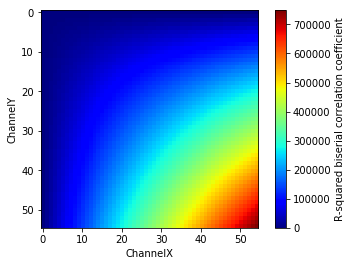

In [26]:
# calculate channelwise covariance matrices 
data_time_point = 380
cov_matrix = np.zeros((len(clab),len(clab)))
for channel_x in range(len(clab)):
    for channel_y in range(len(clab)):
        cov_matrix[channel_x][channel_y] = channel_x * channel_y

print(cov_matrix)
cov_matrix = np.cov(cov_matrix)
print(cov_matrix)
#    start, stop = (np.where(epo_t == interval[i])[0][0] for i in range(2))
    
#    rMatrix = np.zeros((len(clab),stop+1-start))
    
#    for channel in range(len(clab)):
        
#        for i in range(start, stop+1):
 #           x = epo[i,channel,:]
 #           r = rsq(x, y)
            
 #           rMatrix[channel, i - start] = r
    
plt.figure()
img = plt.imshow(cov_matrix)
plt.colorbar(label="R-squared biserial correlation coefficient")
plt.xlabel("ChannelX")
plt.ylabel("ChannelY")
img.set_cmap('jet')

    
#signed_r_square(epo, mrk_class)
# for channel in channels

## channel x channel 
## 380ms as data point
## for both classes with np.cov

## visualize channel x channel pl.imshow
# pl.imshow()

# perform an eigenvalue decomposition (np.linalg.eigh) of covariance matrices 
# plot again class wise the eigenvalue spectrum

# Determine the four principle components (Eigenvectors) for each class that correspond to the largest eigenvalues
# display them as scal maps scalpmap

In [17]:
epo, epo_t = bci.makeepochs(cnt, fs, mrk_pos, [-100, 600])
clab
print(epo_t)

[-100.  -90.  -80.  -70.  -60.  -50.  -40.  -30.  -20.  -10.    0.   10.
   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.  120.  130.
  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.  240.  250.
  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.  360.  370.
  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.  480.  490.
  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.  600.]


In [ ]:
def ellipse_decomp(x,y):
    # Input: x, y numpy arrays of a set of points (according to x and y axis)
    # 
    # Return: ellipse: 2D matrix of the standard deviation ellipse, 
    #         x, y: lists of the eigenvectors with the mean, split into x and y positions.

    t = np.linspace(0,np.pi*2,100)
    
    circ = np.array([np.cos(t), np.sin(t)])

    matrix = np.array([x, y])
    cov = np.cov(matrix)
    eigval, eigvec = np.linalg.eig(cov)

    D = np.diag(np.sqrt(eigval))   
    covroot = np.dot(eigvec, np.dot(D, eigvec))
    
    mean = np.mean(matrix,axis=1)
    elli = np.dot(covroot, circ)
    elli[0] += mean[0]
    elli[1] += mean[1]
    
    vec1 = np.dot(covroot, eigvec[0])
    vec2 = np.dot(covroot, eigvec[1])
    
    x, y = np.split([vec2+mean, mean, vec1+mean], [-1], axis=1)
    return elli, x, y

ival= [-100, 1000]
ref_ival= [-100, 0]
chans = ['Cz', 'PO3']

epo, epo_t = bci.makeepochs(cnt, fs, mrk_pos, ival)
epo = bci.baseline(epo, epo_t, ref_ival)

timeCz = np.where(epo_t == 380)
timePO3 = np.where(epo_t == 300)

iCz = clab.index(chans[0])
iPO3 = clab.index(chans[1])

Cz_values = epo[timeCz, iCz, mrk_class == 1]
PO3_values = epo[timePO3, iPO3, mrk_class == 1]
Cz_targets = epo[timeCz, iCz, mrk_class == 0]
PO3_targets = epo[timePO3, iPO3, mrk_class == 0]

#### MAKING THE ELLIPSES
ellipseT, x1, y1 = ellipse_decomp(Cz_targets[0], PO3_targets[0])
ellipseN, x2, y2 = ellipse_decomp(Cz_values[0], PO3_values[0])

plt.style.use('dark_background')
plt.figure(figsize = [6.4*2, 4.8*2])
plt.grid()
plt.title('Response at Cz (300 ms) and PO3 (380 ms)')
plt.scatter(Cz_values, PO3_values, c = 'm', marker = 'x', label='Nontargets')
plt.scatter(Cz_targets, PO3_targets, c = 'r', marker = 'o', label='Targets')
plt.plot(ellipseT[0], ellipseT[1], 'w')
plt.plot(ellipseN[0], ellipseN[1], 'w')

plt.plot(x1, y1, 'yo-', label ='PC, targets')
plt.plot(x2, y2, 'co-', label = 'PC, nontargets')

plt.ylabel('PO3, potential')
plt.xlabel('Cz, potential')
plt.legend()
plt.show()